# My Portfolio Project for the Coursera's Google Data Analytics Professional Certificate

<center>
    <img src="https://raw.githubusercontent.com/MikSm1th/GoogleCapstone/main/Cousera_screen_shot.png">
</center>

# Introduction

I've been interested in computer programming and data science as a hobby for a few years.\
I have used my skills to automate repetitive tasks in my professional workflow, and to inform fantasy sports decisions.\
Sometimes I wonder if the skills that I have developed while pursuing this hobby have value in the job market.\
I took the Google Data Analytics Professional Certificate to answer this question. 

The team at Google have designed a simple rubric to apply to data science problems. 
- Ask
- Prepare
- Process
- Analyze
- Share
- Act

# Ask
The problem that Google gives it's students for it's capstone project centers around a bike sharing company called Cyclistic. \
This company is trying to understand how it's two major customer segments use the Cyclistic service differently. 
1. Casual riders who purchase single-ride or full-day passes for the Cyclistic service. 
2. Cyclistic members who are riders that purchase annual memberships. 

The finance team at Cyclistic has determined that annual members are the most profitable type of customer. \
Our job as a data analyst is to provide insight to the marketing team for ways to convert casual riders to becoming annual members.

# Prepare

We will be using real bike sharing data from the Divvy company for this capstone.

The raw data for this project is available here --> [bike sharing data](https://divvy-tripdata.s3.amazonaws.com/index.html). 

The license for this data is available here --> [data license](https://ride.divvybikes.com/data-license-agreement).

The assignment asks the student to download data files which need to be unzipped to expose a series of `.csv` files.\
From there the student is instructed to use spreadsheets to create the following two columns in the data: `ride_length`, and `day_of_week`.

# Spreadsheet versus python

The Google Data Analysis certificate teaches the student how to transform data using spreadsheets.\
If I have to perform the same transformations on multiple datasets, the python programming language seems to be the best solution.\
I have sequestered my python script away from this article.\
For the interested reader you can find my python script here --> [Michael's python script](https://github.com/MikSm1th/GoogleCapstone/blob/main/GoogleCapstonePrepareStep.ipynb).

# Process
The next step of the data analyst's job is to make sure that the data is consistent, then we will merge all of our data into one table for analysis.\
I have chosen the R programming language for this task.\
The Google Data Analytics Course teaches R programming as it's final module.\
Again I will seperate the process step into another notebook which the interested reader can access here -> [Michael's R script](https://github.com/MikSm1th/GoogleCapstone/blob/main/GoogleCapstoneProcessStep.ipynb)\
I have taken some liberty as it relates to how Google defines the exact parameters of these steps for the sake of clarity.\
I wanted each notebook to have a clear workflow as it relates to the steps.

# Analyze

This is the part of the course I was most excited to experience.\
I felt as though it would give me clarity on how much my self-directed study has born fruit.\
Google did provide boiler plate code for the below analysis, so I did not bake this cake from scratch.\
The challenge of open source software in my experience is to take what has come before and refactor it to meet the analyst's needs.

The first chunck of code below consists of loading the dataframe and getting columns into their proper data type.\
I loaded my large dataset into Kaggle for this analysis.\
My poor used Lenovo laptop from [Joe's Computer's in Lakewood OH](https://www.joeslakewoodcomputer.com) broke into a cold sweat when I tried to analyze a 1.4 GB dataset.\
The comments inside the code will illuminate the particular steps.


In [1]:
# load libraries
library(tidyverse)
library(lubridate)
library(ggplot2)

# load and trim csv
all_trips <- read_csv("/kaggle/input/all-trips/all_trips.csv")
all_trips <- select(all_trips, -c('...1'))

# properly formatting dates
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

# defining ride length
all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at)

# making sure the numbers are not strings
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

# getting rid of na values and ride lengths of zero
all_trips$ride_length[is.na(all_trips$ride_length)] <- 0
all_trips_cleaned <- all_trips[(all_trips$ride_length>0),]
glimpse(all_trips_cleaned)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


New names:
• `` -> `...1`
Rows: 5901463 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (5): ...1, start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] FALSE

[1] TRUE

Rows: 5,900,827
Columns: 19
$ ride_id            <chr> "99103BB87CC6C1BB", "EAFCCCFB0A3FC5A1", "9EF4F46C57…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2021-08-10 17:15:49, 2021-08-10 17:23:14, 2021-08-…
$ ended_at           <dttm> 2021-08-10 17:22:44, 2021-08-10 17:39:24, 2021-08-…
$ start_station_name <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_station_id   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, "Clark St & Grace St", …
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, "TA1307000127", NA, NA,…
$ start_lat          <dbl> 41.77000, 41.77000, 41.95000, 41.97000, 41.79000, 4…
$ start_lng          <dbl> -87.68000, -87.68000, -87.65000, -87.67000, -87.600…
$ end_lat            <dbl> 41.77000, 41.77000, 41.97000, 41.95000, 41.77000, 4…
$ end_lng            <dbl> -87.68000, -87.63000, -87.66000, -87.65000, -87.620…
$ member_cas

# Summary statistics
More Google recommended boiler plate code.\
This is standard operating procedure for any data analysis.\
Code comments continue to highlight the logic.

In [2]:
# summary stats for all trips ride length
summary(all_trips_cleaned$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     370     657    1194    1189 2497750 

In [3]:
# mean values casual vs annual member ride length
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$member_casual, FUN = mean)

all_trips_cleaned$member_casual,all_trips_cleaned$ride_length
<chr>,<dbl>
casual,1752.9596
member,776.0127


In [4]:
# median values casual vs annual member ride length
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$member_casual, FUN = median)

all_trips_cleaned$member_casual,all_trips_cleaned$ride_length
<chr>,<dbl>
casual,864
member,541


In [5]:
# max values casual vs annual member ride length
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$member_casual, FUN = max)

all_trips_cleaned$member_casual,all_trips_cleaned$ride_length
<chr>,<dbl>
casual,2497750
member,93594


In [6]:
# min values casual vs annual member ride length
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$member_casual, FUN = min)

all_trips_cleaned$member_casual,all_trips_cleaned$ride_length
<chr>,<dbl>
casual,1
member,1


In [7]:
# ordering the days of the week for logic
all_trips_cleaned$day_of_week <- ordered(all_trips_cleaned$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
# mean values casual vs annual member ride length by day
aggregate(all_trips_cleaned$ride_length ~ all_trips_cleaned$member_casual + all_trips_cleaned$day_of_week, FUN = mean)

all_trips_cleaned$member_casual,all_trips_cleaned$day_of_week,all_trips_cleaned$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2038.3645
member,Sunday,877.9249
casual,Monday,1783.4532
member,Monday,754.0940
casual,Tuesday,1527.3643
member,Tuesday,728.8203
casual,Wednesday,1500.2268
member,Wednesday,730.4306
casual,Thursday,1571.9136


In [8]:
# putting the above analysis into a dataframe for future use
all_trips_visualized <- all_trips_cleaned %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  
  group_by(member_casual, weekday) %>%                   
  summarise(number_of_rides = n()
  ,average_duration = mean(ride_length)) %>%           
  arrange(member_casual, weekday)    
View(all_trips_visualized)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,475539,2038.3645
casual,Mon,299626,1783.4532
casual,Tue,273782,1527.3643
casual,Wed,281757,1500.2268
casual,Thu,316087,1571.9136
casual,Fri,347599,1644.5874
casual,Sat,527499,1910.3282
member,Sun,417918,877.9249
member,Mon,472359,754.0940


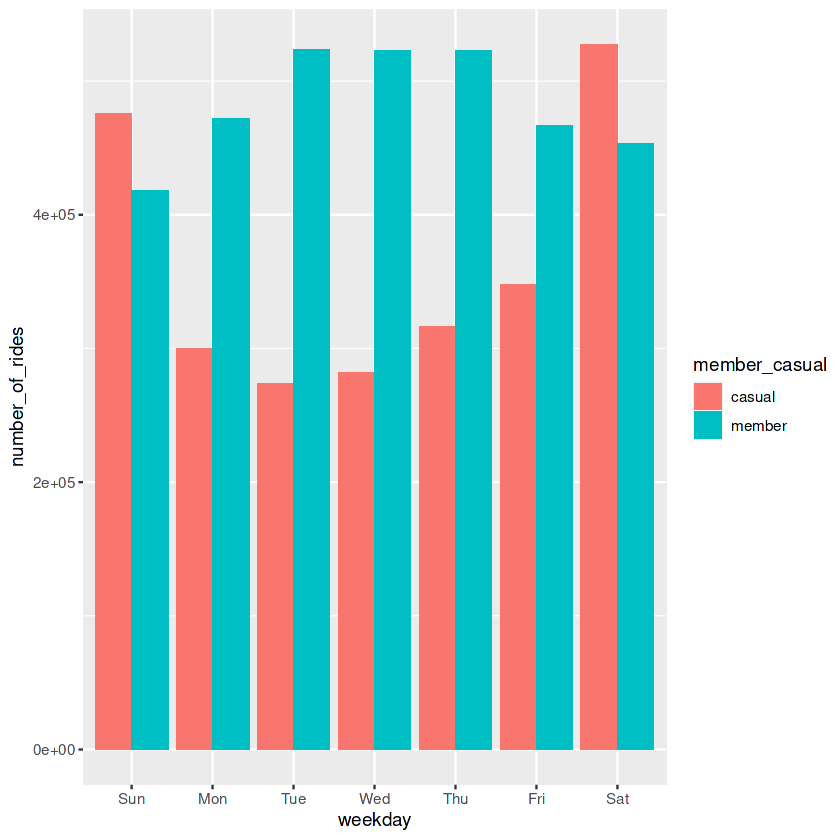

In [9]:
# visualize results by number of rides
all_trips_number_of_rides <- all_trips_visualized %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")
all_trips_number_of_rides

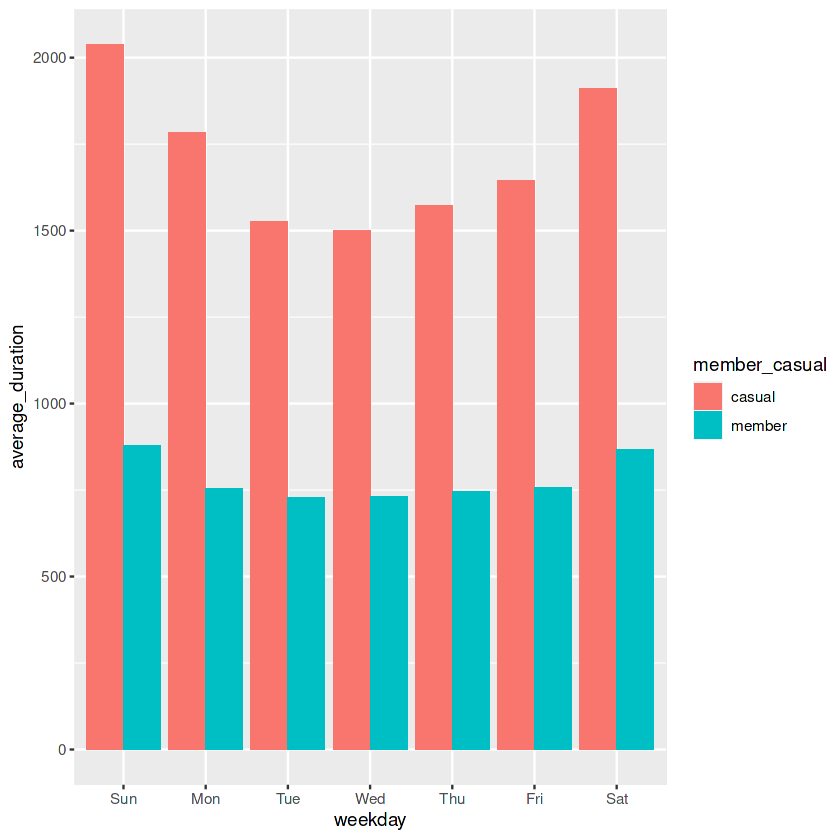

In [10]:
# visualize results by length of ride  
all_trips_average_length <- all_trips_visualized %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")
all_trips_average_length

# Share 

The main thrust of the share section is to evolve the above graphs into a more coherent presentation.\
Continuing with my R code I will leverage the wonderful features of the ggplot package.\
Our first step is to create a graph with a better color scheme.\
I am not a designer so I borrowed the design methodology of the [datawrapper blog](https://blog.datawrapper.de/beautifulcolors/).\
I chose jade and steel blue as my color scheme.\
I will also call an options function to turn off scientific notation.

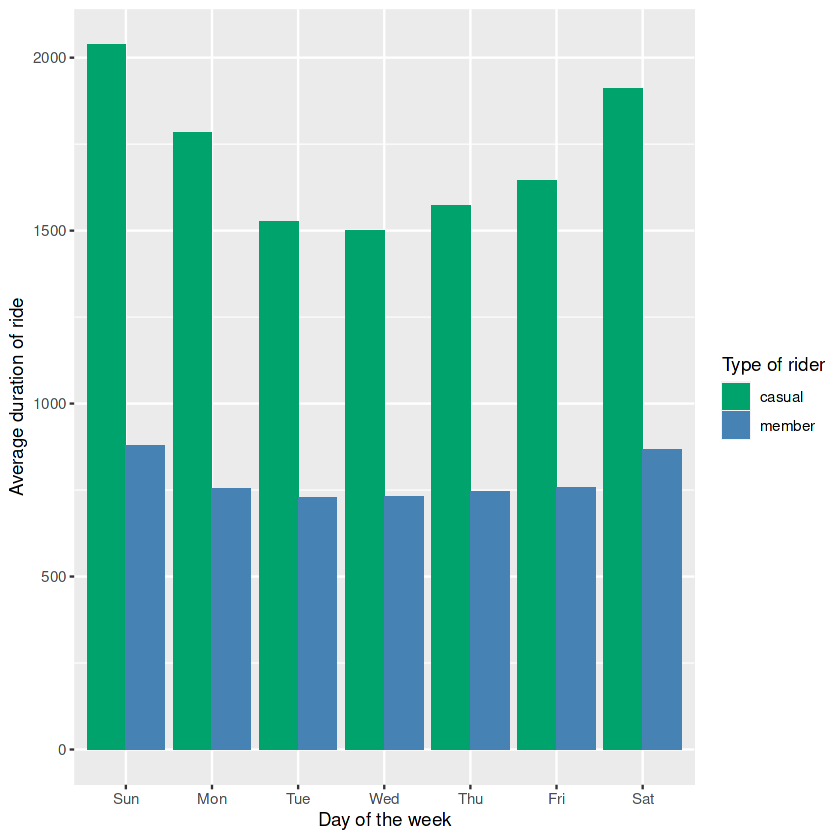

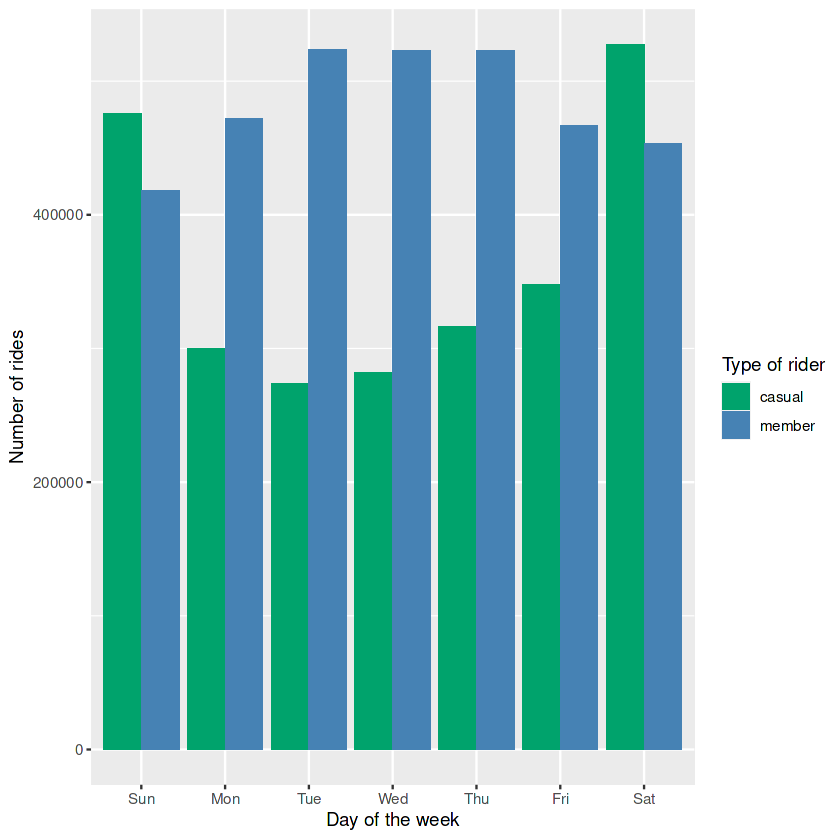

In [11]:
# Turning off scientific notation 
options(scipen=999)

# visualize results by length of ride  
all_trips_average_length <- all_trips_visualized %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  scale_fill_manual(name="Type of rider", values=c("#00A36C", "#4682B4")) +
  xlab("Day of the week") + ylab("Average duration of ride")

all_trips_number_of_rides <- all_trips_visualized %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  scale_fill_manual(name="Type of rider",values=c("#00A36C", "#4682B4")) +
  xlab("Day of the week") + ylab("Number of rides")

all_trips_average_length
all_trips_number_of_rides

# Act

From here I will add these data visualizations to a Google slides presentation that I would present to stakeholders.

That Google Slides presentation lives -> [here](https://docs.google.com/presentation/d/e/2PACX-1vSnoH7yY126F-MoqfZfNNUFc3ApGFiv2XDauFOaNnBB5b7ME9wv6TY8Sv9jHQmB5pcpOT-aM9aadc-G/pub?start=false&loop=false&delayms=10000).\
At the end of the slideshow, I make some recommendations to the Cyclistic marketing team about how to leverage these insights into actionable steps.\
That completes the Act phase of the analysis, and the completion of the Capstone.

# Conclusion and Gratitude

I am grateful both to the Cousera and Google teams for putting together such a great course on data analytics.\
I am both inspired and humbled by all the great content on the Cousera platform.\
Being a student of technology at this late stage of my life has been intimidating.\
The Coursera platform has helped me navigate these waters with ease.\
If you are interested in getting in contact with me my email is: thiscuriousquest@gmail.com.\
You can find me on LinkedIn [here](https://www.linkedin.com/in/michael-smith-7a743267/).\
If you've made it this far, thanks for your time.